#### Model Training 

Import Data and Required Libraries

In [25]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Modelling Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

##### Importing Data as Pandas DataFrame

In [6]:
df = pd.read_csv("data/stud.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
X = df.drop(columns=["math_score"],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [11]:
# Create Column Transformer with 3 Types of Transformers.
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
# Separating  dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [24]:
# Creating a Function to give all Metrics
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    score = r2_score(true,predicted)
    return mae,rmse,score

In [27]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae,model_trian_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- R2 Score: {:4f}".format(model_train_r2))

    print("_______________________________________")

    print("Model performace for Test set")
    print('- Root Mean Squared Error : {:.4f}'.format(model_test_rmse))
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")


Linear Regression
- Root Mean Squared Error : 5.5285
- Mean Absolute Error : 4.2366
- R2 Score: 0.880052
_______________________________________
Model performace for Test set
- Root Mean Squared Error : 5.5285
- Mean Absolute Error : 4.4259
- R2 Score : 0.8465


Lasso
- Root Mean Squared Error : 6.7544
- Mean Absolute Error : 5.1625
- R2 Score: 0.820062
_______________________________________
Model performace for Test set
- Root Mean Squared Error : 6.7544
- Mean Absolute Error : 5.2640
- R2 Score : 0.7708


Ridge
- Root Mean Squared Error : 5.4789
- Mean Absolute Error : 4.2070
- R2 Score: 0.881558
_______________________________________
Model performace for Test set
- Root Mean Squared Error : 5.4789
- Mean Absolute Error : 4.4190
- R2 Score : 0.8492


K-Neighbors Regressor
- Root Mean Squared Error : 6.9605
- Mean Absolute Error : 4.6907
- R2 Score: 0.853102
_______________________________________
Model performace for Test set
- Root Mean Squared Error : 6.9605
- Mean Absolute Error

In [28]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_Score"]).sort_values(by="R2_Score",ascending=False)

,Model Name,R2_Score
2,Ridge,0.849202
0,Linear Regression,0.846456
5,Random Forest Regressor,0.790527
7,AdaBoost Regressor,0.774519
1,Lasso,0.770814
3,K-Neighbors Regressor,0.756615
6,XGBRegressor,0.747964
4,Decision Tree,0.656049


In [29]:
# Linear Regression
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(score)

84.64556441008713


<Axes: xlabel='math_score'>

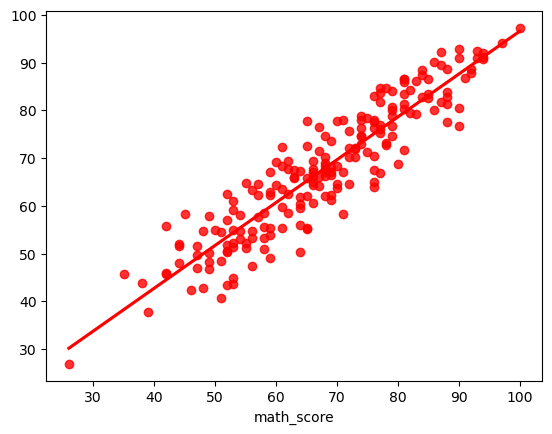

In [30]:
sns.regplot(x=y_test, y= y_pred,ci=None,color="red")